<a href="https://colab.research.google.com/github/arthurfelizdantas/PPGCC/blob/main/Atividade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

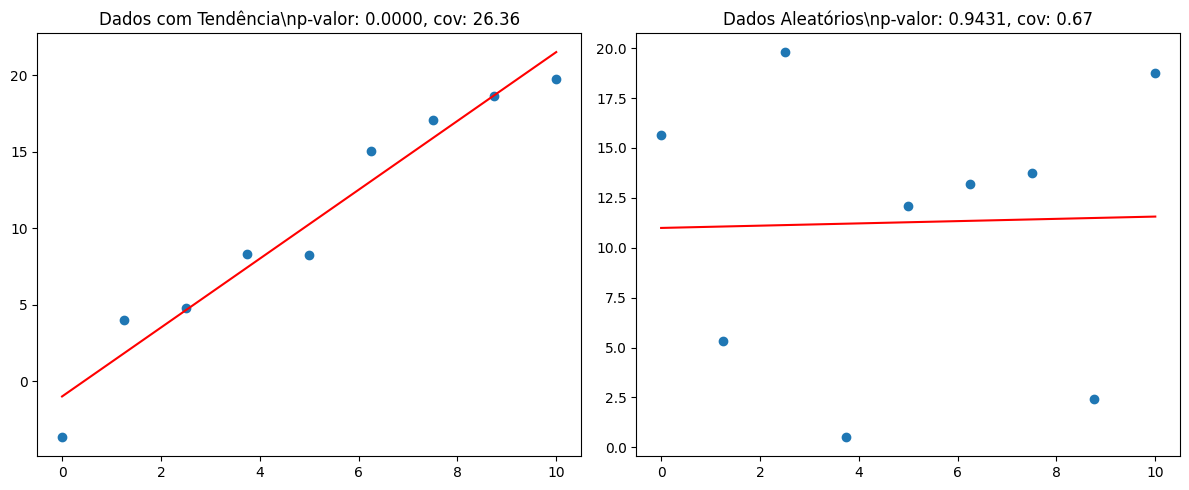

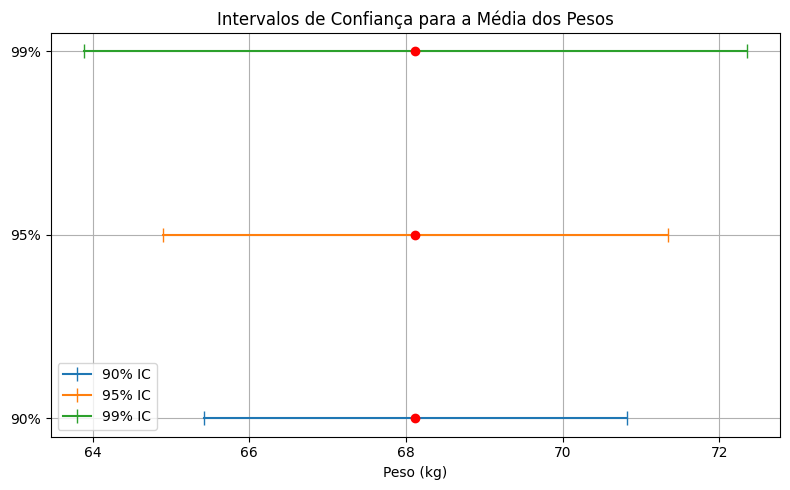

<ipython-input-2-5f7d96787e30>:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo_controle, grupo_teste], labels=['Controle', 'Teste'])  # Boxplot dos grupos


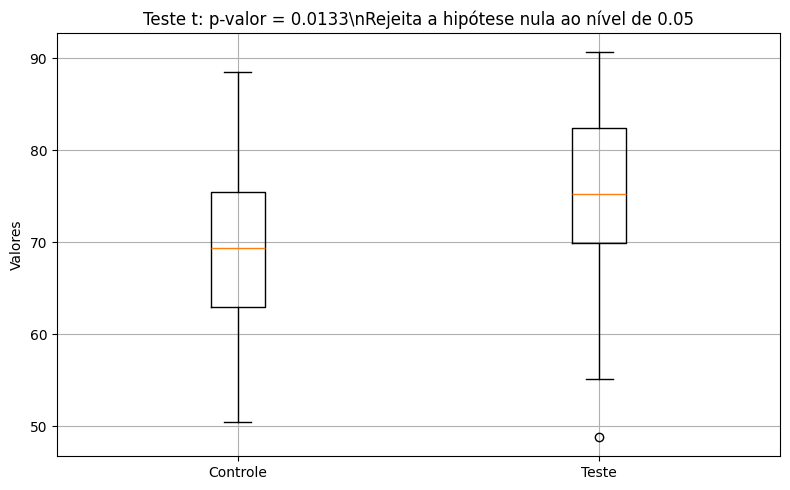

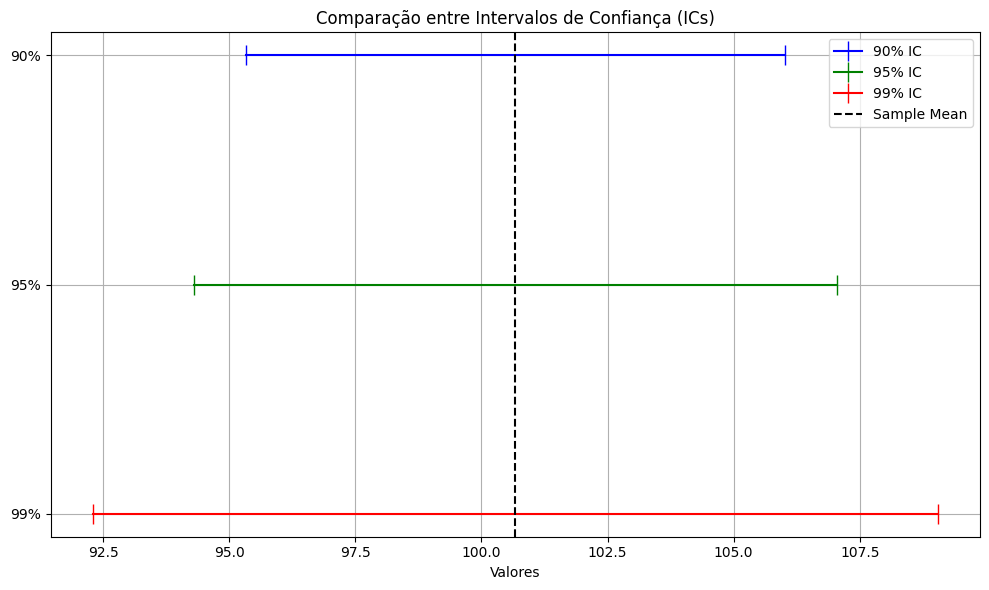

In [2]:
import numpy as np  # Importa o pacote NumPy para cálculos numéricos
import matplotlib.pyplot as plt  # Importa o matplotlib para geração de gráficos
from scipy.stats import linregress, ttest_ind, norm  # Importa funções estatísticas da SciPy

# Parte A - Correlação
x1 = np.linspace(0, 10, 9)  # Gera 9 valores igualmente espaçados entre 0 e 10
y1 = 2 * x1 + np.random.normal(0, 2, size=x1.shape)  # Aplica uma relação linear com ruído gaussiano

x2 = np.linspace(0, 10, 9)  # Mesmo eixo x
y2 = np.random.uniform(0, 20, size=x2.shape)  # Gera y com distribuição uniforme (sem correlação)

# Calcula regressão linear e estatísticas
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

# Calcula a covariância entre x e y
cov1 = np.cov(x1, y1)[0, 1]
cov2 = np.cov(x2, y2)[0, 1]

# Gráficos da Parte A
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1)  # Plota os pontos
plt.plot(x1, slope1 * x1 + intercept1, color='red')  # Plota a reta de regressão
plt.title(f'Dados com Tendência\\np-valor: {p_value1:.4f}, cov: {cov1:.2f}')  # Título com p-valor e covariância

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.plot(x2, slope2 * x2 + intercept2, color='red')
plt.title(f'Dados Aleatórios\\np-valor: {p_value2:.4f}, cov: {cov2:.2f}')
plt.tight_layout()
plt.show()

# Parte B - Intervalo de Confiança
np.random.seed(42)  # Define semente para reprodutibilidade
pesos = np.random.normal(loc=70, scale=10, size=30)  # Simula pesos com média 70 e desvio 10

media_amostra = np.mean(pesos)  # Calcula média
desvio_padrao_amostra = np.std(pesos, ddof=1)  # Calcula desvio padrão com correção de Bessel
n = len(pesos)  # Tamanho da amostra

conf_levels = [0.90, 0.95, 0.99]  # Níveis de confiança
intervalos = {}  # Dicionário para armazenar os intervalos

# Para cada nível de confiança, calcula o intervalo
for conf in conf_levels:
    z = norm.ppf(1 - (1 - conf) / 2)  # Valor z correspondente
    erro_padrao = desvio_padrao_amostra / np.sqrt(n)  # Erro padrão da média
    margem = z * erro_padrao  # Margem de erro
    intervalo = (media_amostra - margem, media_amostra + margem)  # Intervalo de confiança
    intervalos[f'{int(conf*100)}%'] = intervalo  # Armazena

# Gráfico Parte B
plt.figure(figsize=(8, 5))
for i, (label, (lower, upper)) in enumerate(intervalos.items()):
    plt.plot([lower, upper], [i, i], marker='|', markersize=10, label=f'{label} IC')  # Linha do intervalo
    plt.plot(media_amostra, i, 'ro')  # Marca a média
plt.yticks(range(len(intervalos)), intervalos.keys())
plt.title('Intervalos de Confiança para a Média dos Pesos')
plt.xlabel('Peso (kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Parte C - Teste de Hipótese com p-valor
grupo_controle = np.random.normal(loc=70, scale=10, size=30)  # Grupo 1 com média 70
grupo_teste = np.random.normal(loc=75, scale=10, size=30)  # Grupo 2 com média 75
stat, p_value = ttest_ind(grupo_controle, grupo_teste)  # Teste t para duas amostras independentes

# Verifica se rejeita a hipótese nula
resultado = "Rejeita a hipótese nula" if p_value < 0.05 else "Não rejeita a hipótese nula"

# Gráfico Parte C
plt.figure(figsize=(8, 5))
plt.boxplot([grupo_controle, grupo_teste], labels=['Controle', 'Teste'])  # Boxplot dos grupos
plt.title(f'Teste t: p-valor = {p_value:.4f}\\n{resultado} ao nível de 0.05')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte E - Slides 24 a 46: Comparação de ICs
np.random.seed(123)  # Reprodutibilidade
media_pop = 100  # Média da população
desvio_pop = 15  # Desvio padrão
n = 30

# Valores z
z_95 = norm.ppf(0.975)
z_90 = norm.ppf(0.95)
z_99 = norm.ppf(0.995)

# Amostra
amostra = np.random.normal(media_pop, desvio_pop, size=n)
media_amostra = np.mean(amostra)
erro_padrao = np.std(amostra, ddof=1) / np.sqrt(n)

# ICs
ic_90 = (media_amostra - z_90 * erro_padrao, media_amostra + z_90 * erro_padrao)
ic_95 = (media_amostra - z_95 * erro_padrao, media_amostra + z_95 * erro_padrao)
ic_99 = (media_amostra - z_99 * erro_padrao, media_amostra + z_99 * erro_padrao)

# Gráfico Parte E
plt.figure(figsize=(10, 6))
plt.plot(ic_90, [2, 2], label='90% IC', color='blue', marker='|', markersize=15)
plt.plot(ic_95, [1, 1], label='95% IC', color='green', marker='|', markersize=15)
plt.plot(ic_99, [0, 0], label='99% IC', color='red', marker='|', markersize=15)
plt.axvline(media_amostra, color='black', linestyle='--', label='Sample Mean')
plt.yticks([0, 1, 2], ['99%', '95%', '90%'])
plt.title('Comparação entre Intervalos de Confiança (ICs)')
plt.xlabel('Valores')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()